In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [17]:
mpg = sns.load_dataset("mpg")
mpg.shape

(398, 9)

In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
mpg["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [15]:
mpg["cylinders"].value_counts()/(mpg.shape[0]/100)

4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: cylinders, dtype: float64

In [20]:
columns = list(mpg.columns)

In [25]:
cats = list(mpg.select_dtypes(include=["object"]).columns)
nums = list(mpg.select_dtypes(exclude=["object"]).columns)
cats.extend(["cylinders", "model_year"])
nums.remove("cylinders")
nums.remove("model_year")

print(f"categorical data: {cats}")
print(f"numerical data: {nums}")

categorical data: ['origin', 'name', 'cylinders', 'model_year']
numerical data: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [26]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


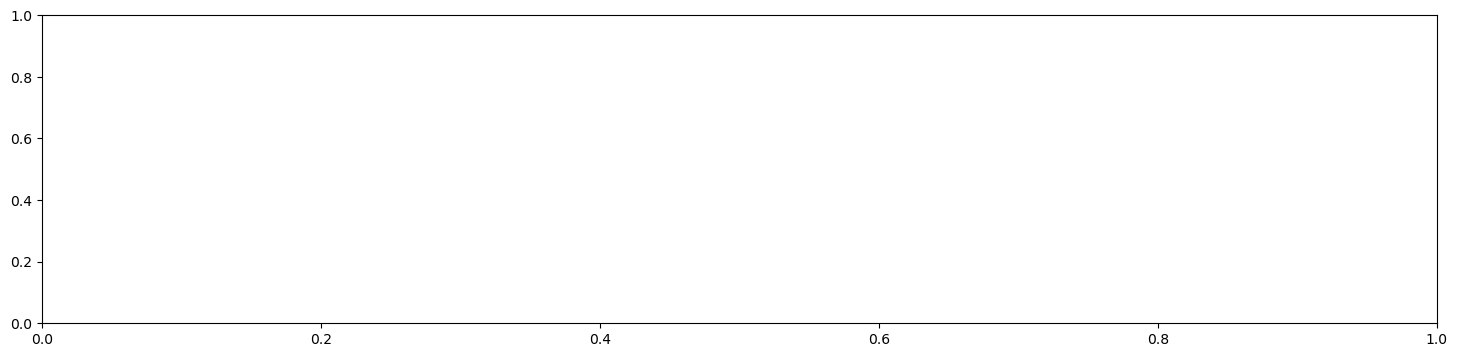

In [30]:
fig = plt.figure(1,(18,4))
ax = plt.subplot(1,1,1)

plt.show()

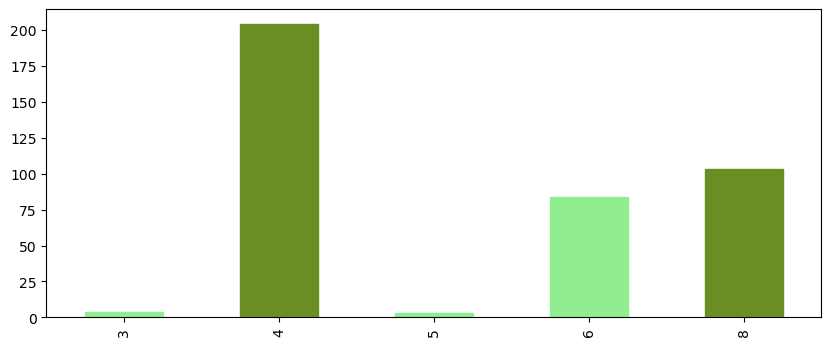

In [45]:
plt.figure(figsize=(10,4))
colors = ["#90EE90","olivedrab","#90EE90","#90EE90","olivedrab"]
ax = mpg["cylinders"].value_counts().sort_index().plot(kind="bar")
for obj,  cl in zip(ax.patches, colors):
    obj.set_color(cl)
plt.show()

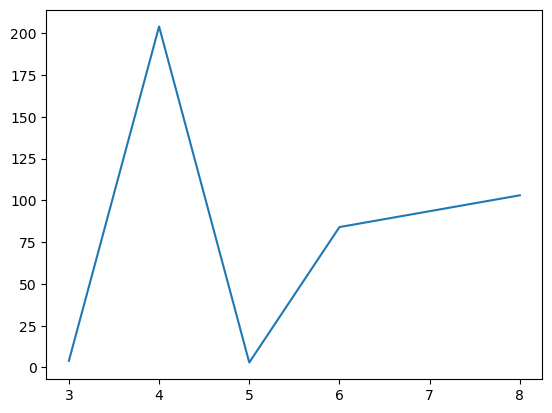

In [43]:
ax = mpg["cylinders"].value_counts().sort_index().plot(kind="line")
plt.show()

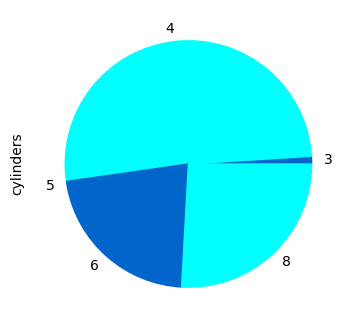

In [50]:
plt.figure(figsize=(10, 4))
colors = ["#0066cc", "cyan", "#0066cc", "#0066cc", "cyan"]
ax = mpg["cylinders"].value_counts().sort_index().plot(kind="pie")
for obj, cl in zip(ax.patches, colors):
    obj.set_color(cl)
plt.show()

Text(0.5, 1.0, 'Distribution of Cylinders')

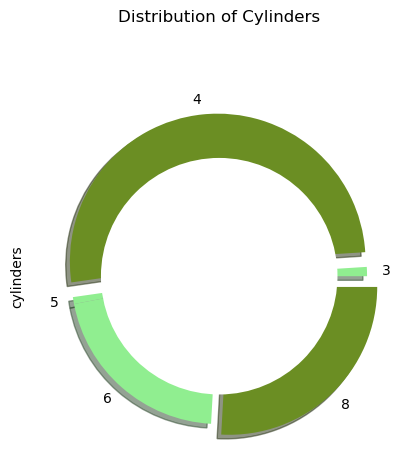

In [70]:
from matplotlib import patches
mpg["cylinders"].value_counts().sort_index().plot(kind="pie", shadow="True", explode=[0,0.1,0,0,0.1], colors = ["#90EE90","olivedrab","#90EE90","#90EE90","olivedrab"])

ax = plt.gca()
circle = patches.Circle((0,0),0.8,facecolor="white")
ax.add_artist(circle)
ax.set_title("Distribution of Cylinders", pad=50)